### Student Information
Name:蔡洵晟

Student ID:109065466

GitHub ID:veblen-cai

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# 1

In [49]:
#the necessary part we must first run to answer the following question.

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X_sample = X.sample(n=1000) #random state

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
#analyze("Hello World!")
#" ".join(list(X[4:5].text))

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [10]:
# Answer here
for t in twenty_train.data[:3]:
    print("\n".join(t.split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [14]:
#Answer here
X[X['category'] == 2]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [20]:
# Answer here
X.loc[lambda f: f.category_name == 'comp.graphics'].iloc[::10, :][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [19]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [21]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [22]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
describe what observe:
    Isnull can be used to detected np.nan,empty value,None,
    but can not be used to detect the string like 'NaN' and 'None'
    
why it happened   
    The function Isnull can be used to judge lots of missing types,
    include NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike.
    But 'NaN' and 'None' are not-null string.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [25]:
# Answer here

#1.The total num of records decreases from 2257 to 1000.
print(X.shape[0],len(X_sample))

#2.The sequence of records is changed.

2257 1000


### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

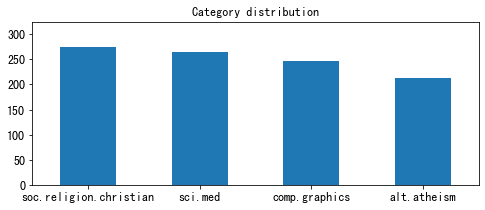

In [26]:
# Answer here

# plot barchart for X_sample
# min_y = min(X_sample.category_name.value_counts())
max_y_sample = max(X_sample.category_name.value_counts()) + 50
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max_y_sample], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

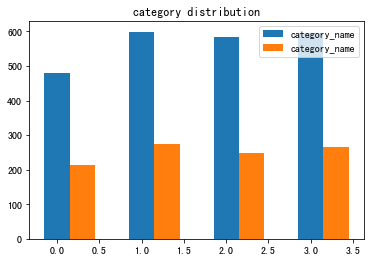

In [27]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np

x = categories
y_sample = [X_sample[X_sample['category_name'] == i].shape[0] for i in x]
y = [X[X['category_name'] == i].shape[0] for i in x]

bar_width = 0.3  # 条形宽度
index_x = np.arange(len(x)) 
index_x_sample = index_x + bar_width  
plt.bar(index_x, height=y, width=bar_width, color='#1F77B4', label='category_name')
plt.bar(index_x_sample, height=y_sample, width=bar_width, color='#FF7E0E', label='category_name')

plt.legend()  # 显示图例
plt.title('category distribution')  # 图形标题

plt.show()

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [31]:
print(analyze(X.text[0]))

['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [32]:
# Answer here
index=list(X_counts[4:5,:100].toarray()[0][1:]).index(1)+1
analyze(X.text[4])[index]

'56'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [33]:
X_counts.shape

(2257, 35788)

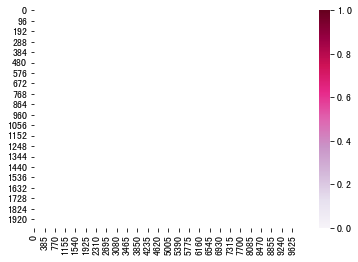

In [36]:
# Answer here
import seaborn as sns
sns.heatmap(X_counts.toarray()[:2000,:10000],cmap="PuRd",
                 vmin=0, vmax=1, )

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [39]:
# Answer here
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

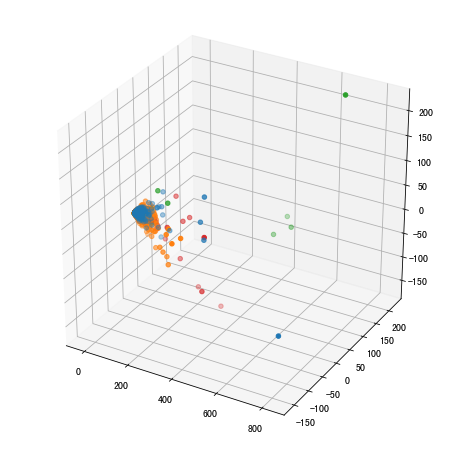

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
col = ['coral', 'blue', 'black', 'm']

ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs=X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs,ys,zs, marker='o')

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [70]:
import chart_studio
# Answer here
from plotly.offline import plot
#import chart_studio.plotly.plotly as py
import plotly.graph_objs as go
trace_basic = [go.Bar(
 x = count_vect.get_feature_names()[:300],
 y = term_frequencies[:300],
 )]
layout_basic = go.Layout(
 title = 'Words Freq',)
figure_basic = go.Figure(data = trace_basic, layout = layout_basic)
plot(figure_basic, filename='grouped-bar.html')

/Users/chenyeming/opt/anaconda3/lib/python3.8/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `grouped-bar` didn't end with .html. Adding .html to the end of your file.



'grouped-bar.html'

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


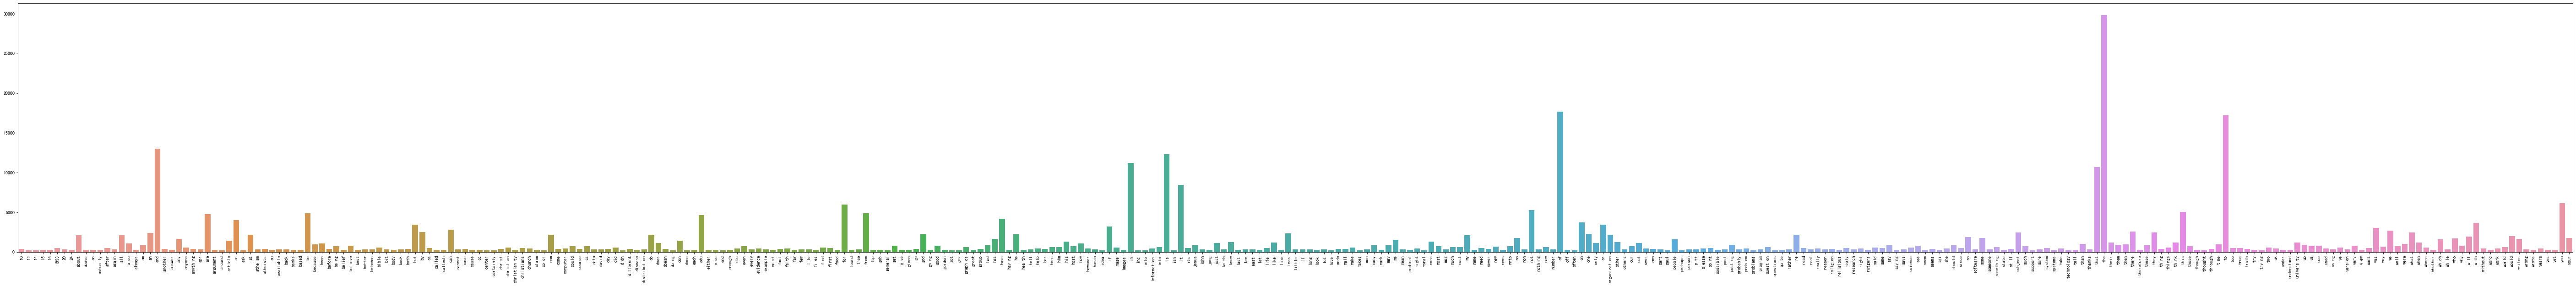

In [52]:
# Answer here
high_freq_term_index=np.where(term_frequencies>np.quantile(term_frequencies,0.99))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(count_vect.get_feature_names())[high_freq_term_index], 
            y=np.array(term_frequencies)[high_freq_term_index])
g.set_xticklabels(np.array(count_vect.get_feature_names())[high_freq_term_index], rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

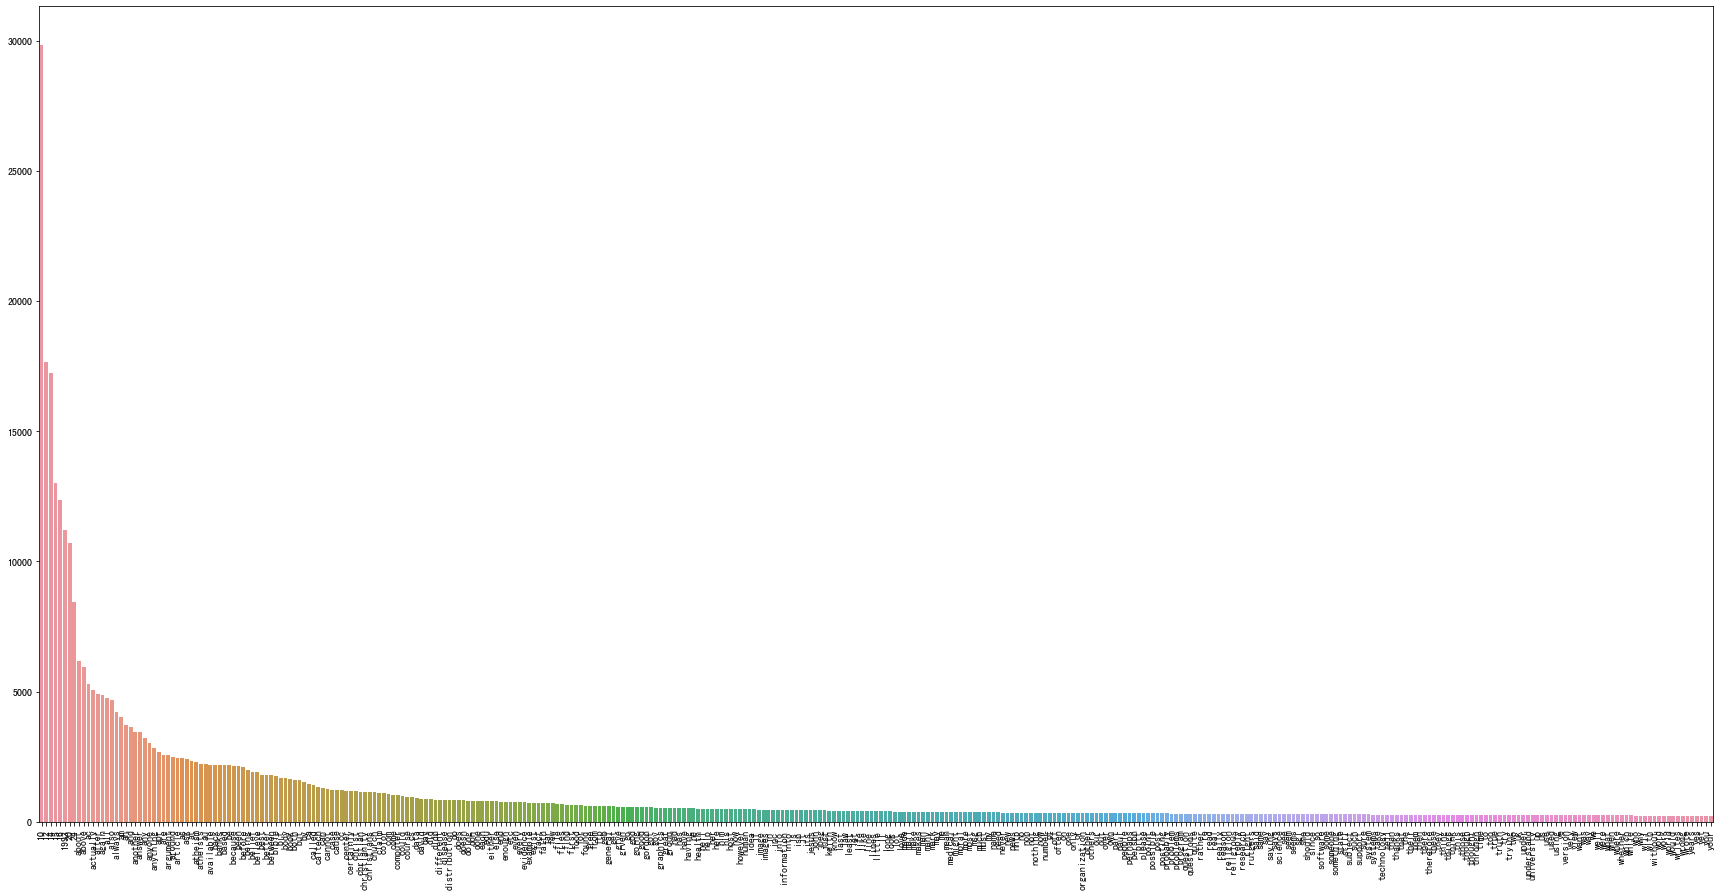

In [53]:
# Answer here
x=np.array(count_vect.get_feature_names())[high_freq_term_index]
y=np.array(term_frequencies)[high_freq_term_index]
y[np.argsort(y)][::-1]
plt.subplots(figsize=(30, 15))
g = sns.barplot(x=x[np.argsort(y)][::-1], 
            y=y[np.argsort(y)][::-1])
g.set_xticklabels(np.array(count_vect.get_feature_names())[high_freq_term_index], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [55]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])
X['bin_category_name']=mlb.transform(X['category_name']).tolist()

In [56]:
X.head()

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"


# 2

### data exploration

In [153]:
import pandas as pd
import numpy as np
from collections import Counter
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

In [154]:
df=pd.read_table('sentiment labelled sentences/amazon_cells_labelled.txt',header=None)
df.columns=['sentence','label']

In [155]:
for i in range(3):
    print(df['sentence'][i])

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [156]:
df[df['label'] == 1]

,sentence,label
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
...,...,...
971,Excellent product.,1
975,It is the best charger I have seen on the mark...,1
976,SWEETEST PHONE!!!,1
977,":-)Oh, the charger seems to work fine.",1


In [157]:
df.loc[lambda f: f.label == 0].iloc[::10, :][0:5]

,sentence,label
0,So there is no way for me to plug it in here i...,0
20,I went on Motorola's website and followed all ...,0
37,Poor Talk Time Performance.,0
60,Essentially you can forget Microsoft's tech su...,0
83,The battery runs down quickly.,0


### missing data processing

In [158]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                 (The amoung of missing records is: , 0)
category             (The amoung of missing records is: , 0)
category_name        (The amoung of missing records is: , 0)
bin_category_name    (The amoung of missing records is: , 0)
dtype: object

In [159]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

*there' s no missing data in this dataset*

---

### duplicated data processing

In [160]:
sum(df.duplicated())

10

In [161]:
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

*we have dropped the duplicated data*

---

### Data Preprocessing

In [162]:
df_sample = df.sample(n=800) #random state

In [165]:
# Answer here

#1.The total num of records decreases from 2257 to 1000.
print(df.shape[0],len(df_sample))

#2.The sequence of records is changed.

980 800


0    494
1    486
Name: label, dtype: int64


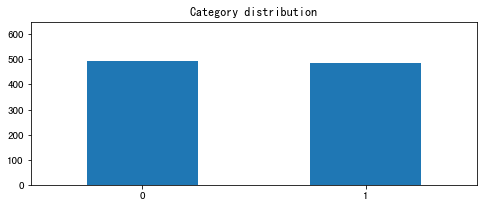

In [166]:
print(df.label.value_counts())

# plot barchart for X_sample
df.label.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    400
0    400
Name: label, dtype: int64


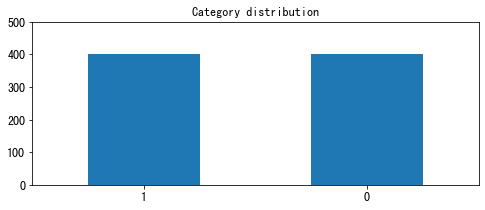

In [167]:
print(df_sample.label.value_counts())

# plot barchart for X_sample
df_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 500], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

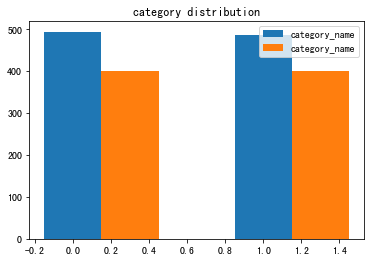

In [170]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np

x = [0,1]
y_sample = [df_sample[df_sample['label'] == i].shape[0] for i in x]
y = [df[df['label'] == i].shape[0] for i in x]

bar_width = 0.3  # 条形宽度
index_x = np.arange(len(x)) 
index_x_sample = index_x + bar_width  
plt.bar(index_x, height=y, width=bar_width, color='#1F77B4', label='category_name')
plt.bar(index_x_sample, height=y_sample, width=bar_width, color='#FF7E0E', label='category_name')

plt.legend()  # 显示图例
plt.title('category distribution')  # 图形标题

plt.show()

---

### Feature subset selection

In [171]:
import nltk
# takes a like a minute or two to process
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [172]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

In [173]:
analyze = count_vect.build_analyzer()

In [174]:
# Answer here
print(analyze(df.sentence[0]))

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


In [175]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [176]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [177]:
plot_z = df_counts[0:20, 0:20].toarray()

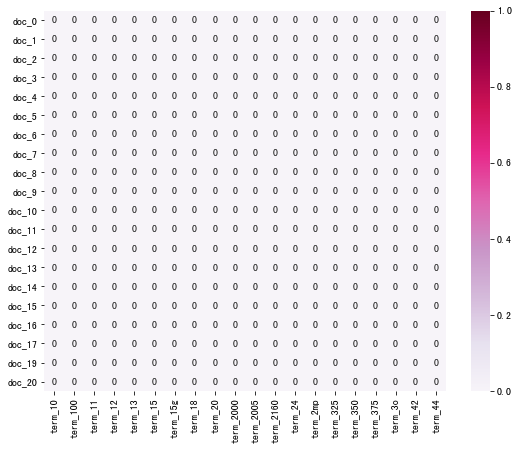

In [178]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### Dimensionality Reduction

In [179]:
from sklearn.decomposition import PCA

In [180]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

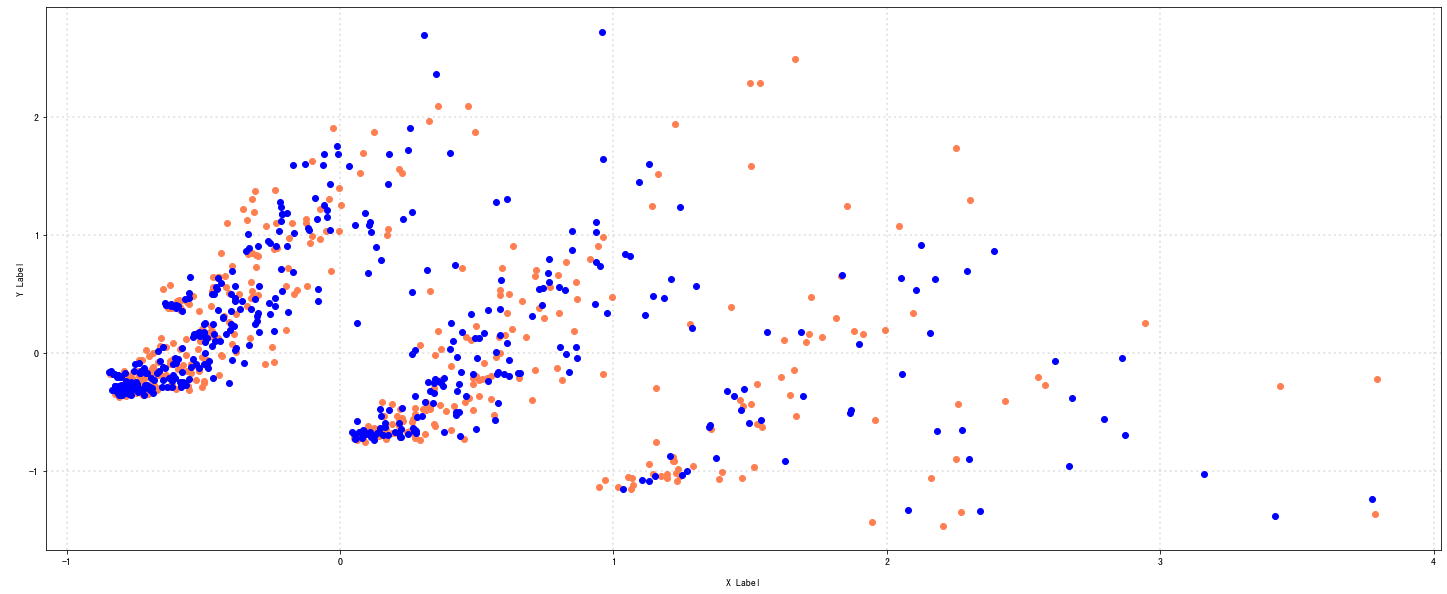

In [181]:
col = ['coral', 'blue']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, [0,1]):
    xs = df_reduced[df.label == category].T[0]
    ys = df_reduced[df.label== category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [186]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

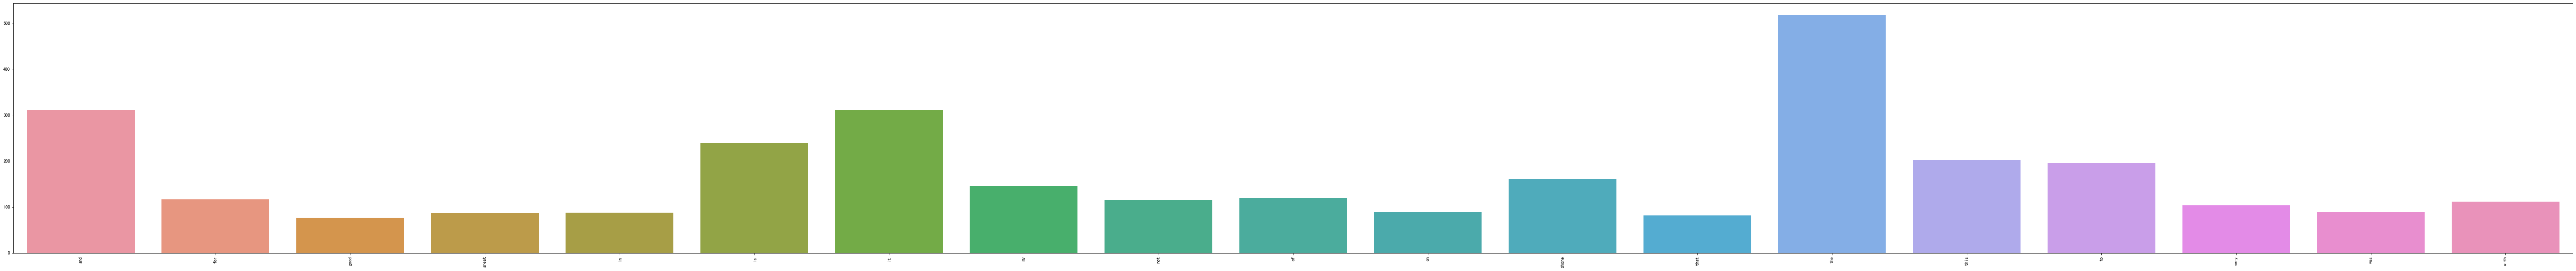

In [187]:
# Answer here
high_freq_term_index=np.where(term_frequencies>np.quantile(term_frequencies,0.99))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(count_vect.get_feature_names())[high_freq_term_index], 
            y=np.array(term_frequencies)[high_freq_term_index])
g.set_xticklabels(np.array(count_vect.get_feature_names())[high_freq_term_index], rotation = 90);

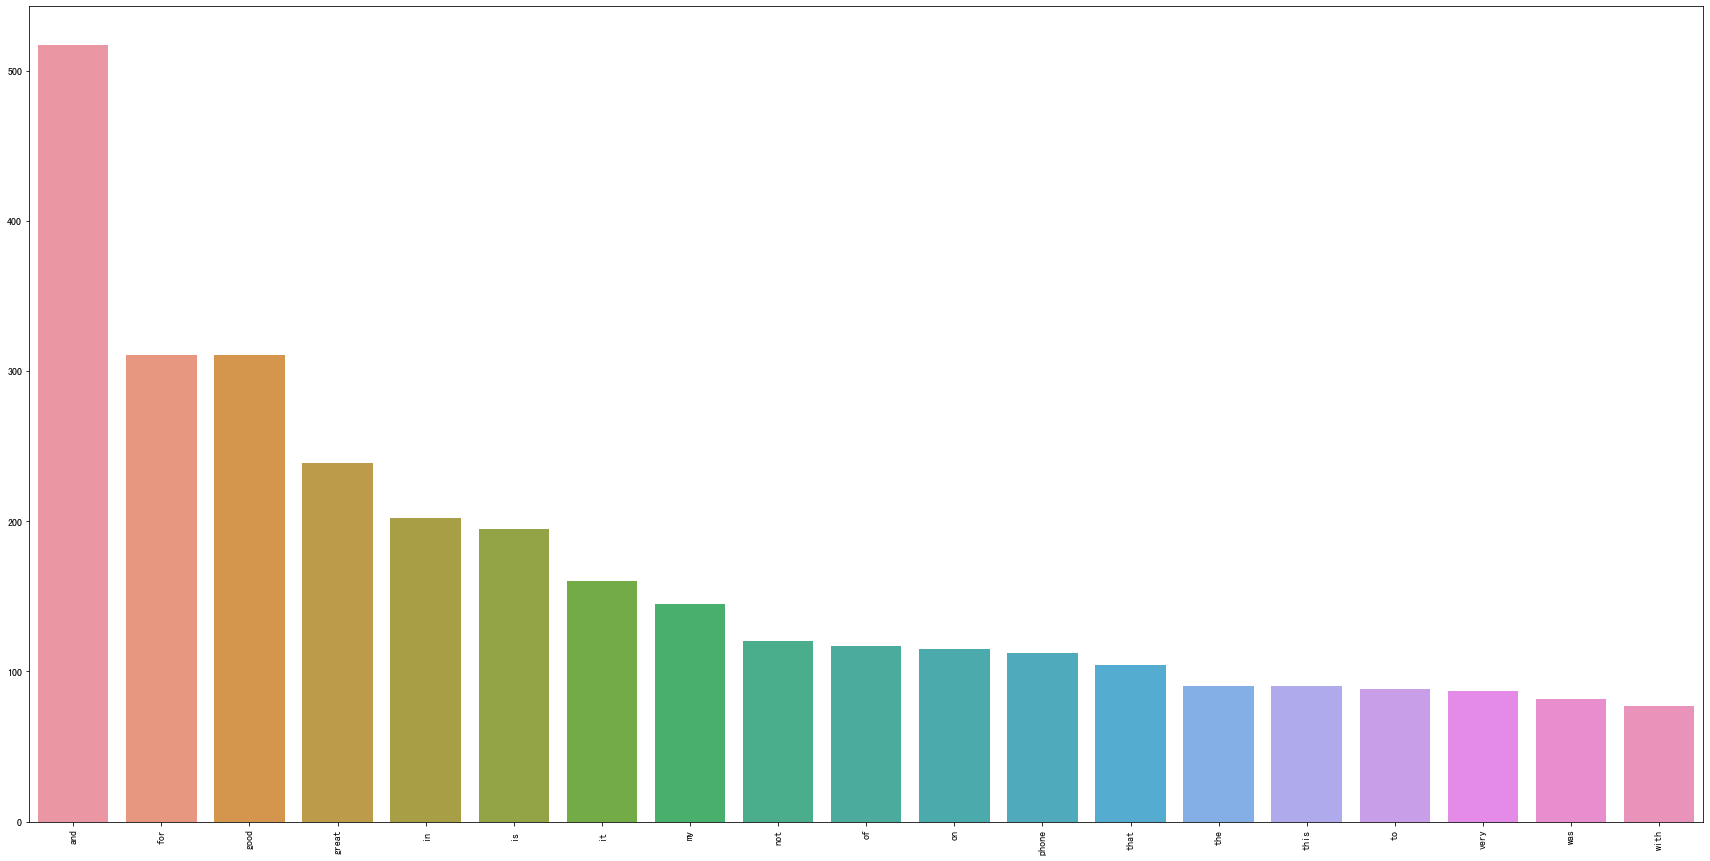

In [188]:
# Answer here
x=np.array(count_vect.get_feature_names())[high_freq_term_index]
y=np.array(term_frequencies)[high_freq_term_index]
y[np.argsort(y)][::-1]
plt.subplots(figsize=(30, 15))
g = sns.barplot(x=x[np.argsort(y)][::-1], 
            y=y[np.argsort(y)][::-1])
g.set_xticklabels(np.array(count_vect.get_feature_names())[high_freq_term_index], rotation = 90);

---

### Discretization and Binarization

In [133]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [136]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.label)
df['bin_label']=mlb.transform(df.label).tolist()

In [137]:
df

,sentence,label,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
...,...,...,...,...
995,The screen does get smudged easily because it ...,0,"[The, screen, does, get, smudged, easily, beca...",[0]
996,What a piece of junk.. I lose more calls on th...,0,"[What, a, piece, of, junk, .., I, lose, more, ...",[0]
997,Item Does Not Match Picture.,0,"[Item, Does, Not, Match, Picture, .]",[0]
998,The only thing that disappoint me is the infra...,0,"[The, only, thing, that, disappoint, me, is, t...",[0]


---

# 3

### We get data

In [77]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [78]:
df=pd.read_table('sentiment labelled sentences/amazon_cells_labelled.txt',header=None)
df.columns=['sentence','lable']

In [79]:
df.head()

,sentence,lable
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Generate meaningful new data visualizations

(-0.5, 399.5, 199.5, -0.5)

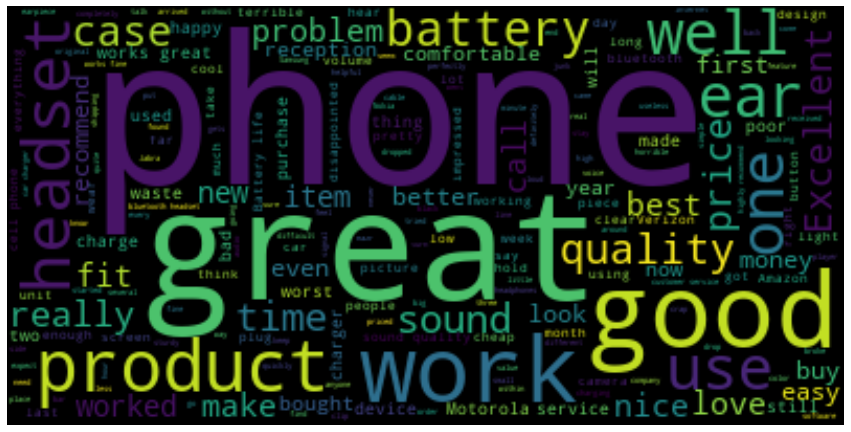

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
from wordcloud import WordCloud
text = ''.join(df['sentence'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

---

### Generate TF-IDF features

In [81]:
vectorizer=CountVectorizer()

x=vectorizer.fit_transform(df.sentence).toarray()

In [83]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(x).toarray()

In [84]:
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
train_num=800

Use word frequency to train Naive Bayes

In [86]:
word_freq_nb=GaussianNB()
word_freq_nb.fit(x[:train_num],df.lable.iloc[:train_num])
word_freq_pred=word_freq_nb.predict(x[train_num:])
f1_score(df.lable.iloc[train_num:],word_freq_pred)

0.6829268292682926

---

### Implement a simple Naive Bayes classifier

Use TF-IDF to train Naive Bayes

In [87]:
tfidf_nb=GaussianNB()
tfidf_nb.fit(tfidf[:train_num],df.lable.iloc[:train_num])
tfidf_pred=tfidf_nb.predict(tfidf[train_num:])
f1_score(df.lable.iloc[train_num:],tfidf_pred)

0.6633165829145728

It can be seen that the performance of the naive Bayes model trained using word frequency is better than the model using TF-IDF

---

# 4

- text does not remove stop words, meaningless stop words will adversely affect the results

- Remove the non-text part of the data. Since there are many html tags in the crawled content, they need to be removed. There are also a small amount of non-text content that can be directly deleted with Python's regular expression (re), and there are some special non-English characters and punctuation marks, which can also be deleted with Python's regular expression (re).

- Stemming and lemmatization are features of English text preprocessing. The two actually have something in common, that is, to find the original form of the word. It's just that stemming will be more radical. It can get stems that are not words when searching for stems. For example, the stem of "leaves" may get "leav", not a word. The form of the word is also conservative in principle, and it generally only deals with words that can be reduced to a correct word. There are many methods provided in nltk, and the wordnet method is easier to use, and the words will not be simplified too much.

- English words are case-sensitive. Python and python are the same word, so converting to lowercase can reduce the number of words.